In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv('preprocessed_data3.csv')

# Data preprocessing
df['Locationingene'] = df['Locationingene'].str.replace('\s+', ' ', regex=True).str.strip().str.replace('Exon ', '')
numerical_features = ['cDNA', 'Amino acid (HGVS)', 'Amino acid (Legacy)']
categorical_features = ['Sequence Context', 'nitroBaseBef', 'nitroBaseAft',
                        'Original AA', 'New AA', 'AminoBefore', 'AminoAfter',
                        'Locationingene']

# Prepare data
X = df[numerical_features + categorical_features].copy()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Severity'])

# Encode categorical features with label encoding
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Standardize numerical features
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(X[numerical_features])

# Combine features
X_combined_features = np.hstack((scaled_numerical_features, X[categorical_features]))


processed_df = pd.DataFrame(X_combined_features, columns=numerical_features + categorical_features)
processed_df['Severity'] = y

# Save the processed DataFrame to CSV
output_path = "after_preprocessing.csv"
processed_df.to_csv(output_path, index=False)


# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(
    max_depth=15,
    n_estimators=50,
    criterion="entropy",
    max_features="log2",
    random_state=42
)

# Initialize KFold with shuffling
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with shuffling
cv_scores = cross_val_score(rf_classifier, X_combined_features, y, cv=skf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Fit the model on the entire training data
rf_classifier.fit(X_combined_features, y)

# Split the data (for reporting purposes; can use the same split for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_combined_features, y, test_size=0.2, random_state=42)

# Predict on test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest classifier
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy on Test Data: {rf_accuracy:.4f}")
print("Random Forest Classification Report on Test Data:")
print(rf_classification_report)


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Samyukta B\AppData\Local\Temp\ipykernel_41656\2945448438.py:12: SyntaxWarning: invalid escape sequence '\s'
  df['Locationingene'] = df['Locationingene'].str.replace('\s+', ' ', regex=True).str.strip().str.replace('Exon ', '')


Cross-Validation Accuracy Scores: [0.73926868 0.73906126 0.72951472 0.72235481 0.72553699]
Mean Cross-Validation Accuracy: 0.7311 ± 0.0069
Random Forest Accuracy on Test Data: 0.8553
Random Forest Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       589
           1       0.70      0.61      0.65       262
           2       0.88      0.92      0.90       407

    accuracy                           0.86      1258
   macro avg       0.83      0.82      0.82      1258
weighted avg       0.85      0.86      0.85      1258



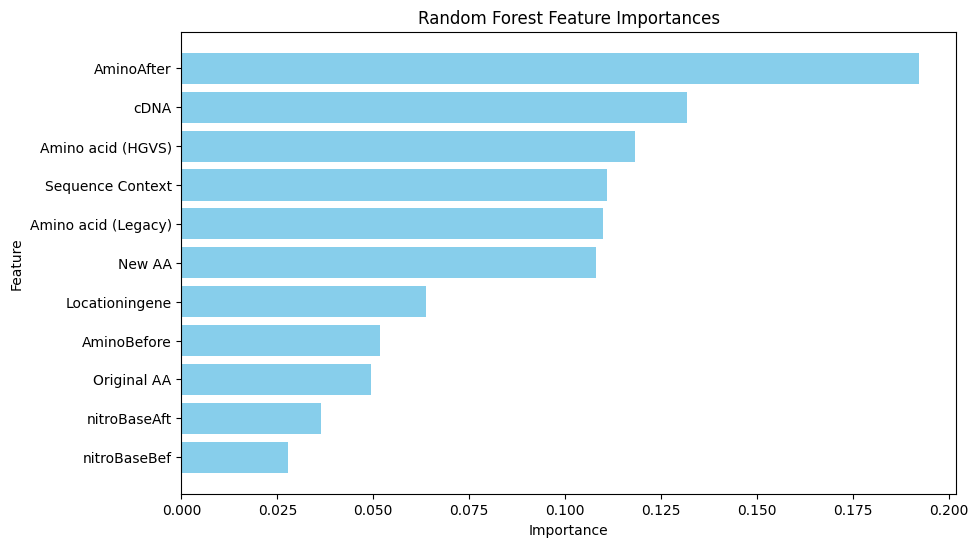

In [19]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Get feature names
feature_names = numerical_features + categorical_features

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()
